<a href="https://colab.research.google.com/github/UserMarcos/Master_IA/blob/main/07MIAR_Proyecto_Programacion_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


Enlace al fichero en colab:

https://colab.research.google.com/drive/17nJT7hfp3YMYDdNfeUhyH0fDmHd7WzX-?usp=sharing

Enlace de Github:

https://github.com/UserMarcos/Master_IA/blob/main/07MIAR_Proyecto_Programacion_Redes_Neuronales.ipynb

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito

- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

## Carga de datos desde la plataforma Kaggle

Procedemos a realizar la carga del dataset desde la plataforma de Kaggle.

Para ello, seguimos los pasos descritos por el profesor de la asignatura, Julio Silva-Rodríguez.

In [1]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 737.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=2df265aefe7d79882938c936d6428f835dd628f585629b8310641fa5d5812c66
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [2]:
#%%capture
# Seleccionamos el API Token personal previamente descargado en un fichero JSON (kaggle.json)
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                           1MB  2024-04-10 09:48:38           3344         67  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                                   3KB  2024-03-02 18:50:30          30274        584  0.9411765        
nayanack/netflix                                       Netflix Chronicles: Exploring Movies and TV Shows     1MB  2024-04-16 07:36:08           1075         23  0.88235295       
sakshisatre/social-advertisement-dataset               Social Media Consumer Buying Behavior Dataset     

#### Descarga del __Dataset__ de los pájaros

El siguiente paso, una vez cargados los datos de la plataforma de Kaggle, procedemos a descargar el dataset asignados a nuestro proyecto. En nuestro caso, se trata del dataset '100-bird-species'.

In [5]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición
#!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!kaggle datasets download -d gpiosenka/100-bird-species

#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100% 1.95G/1.96G [00:20<00:00, 99.0MB/s]
100% 1.96G/1.96G [00:20<00:00, 100MB/s] 


In [6]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [7]:
# Descomprimimos los datos y los dejamos listos para trabajar
%%capture
!unzip 100-bird-species.zip -d my_dataset

In [8]:
#%%capture
!ls

100-bird-species.zip  kaggle.json  my_dataset  sample_data


## Inspección y acondicionamiento de los datos

Para mostrar los datos y analizar como están estructurados, cargamos en un _dataframe_ el fichero "my_dataset/birds.csv". Mostramos las 10 primeras filas del dataframe para obtener una referencia de la estructura de los datos.

In [9]:
import pandas as pd

# Carga de datos en dataframe
df = pd.read_csv("my_dataset/birds.csv")

# Información del dataframe
display(df.sample(10))
print("[INFO] Numero de elementos:" ,len(df))

NDatos = df['data set'].value_counts()
print("[INFO] Número del conjunto train:", NDatos['train'])
print("[INFO] Número del conjunto valid:", NDatos['valid'])
print("[INFO] Número del conjunto test:", NDatos['test'])

# Cantidad de tipos de pájaros
nEspecies = df.nunique()['labels']
print("[INFO] Número de especies:", nEspecies)

,class id,filepaths,labels,data set,scientific name
71558,446.0,train/SORA/188.jpg,SORA,train,PORZANA CAROLINA
72181,451.0,train/SPOTTED WHISTLING DUCK/011.jpg,SPOTTED WHISTLING DUCK,train,DENDROCYGNA GUTTATA
47436,299.0,train/INLAND DOTTEREL/092.jpg,INLAND DOTTEREL,train,CHARADRIUS AUSTRALIS
83578,519.0,train/OILBIRD/163.jpg,OILBIRD,train,STEATORNIS CARIPENSIS
5641,36.0,train/ASHY STORM PETREL/041.jpg,ASHY STORM PETREL,train,OCEANODROMA HOMOCHROA
22020,138.0,train/CHESTNUT WINGED CUCKOO/170.jpg,CHESTNUT WINGED CUCKOO,train,CLAMATOR COROMANDUS
49694,313.0,train/KING EIDER/101.jpg,KING EIDER,train,SOMATERIA SPECTABILIS
5349,34.0,train/APOSTLEBIRD/028.jpg,APOSTLEBIRD,train,STRUTHIDEA CINEREA
34709,219.0,train/FAN TAILED WIDOW/037.jpg,FAN TAILED WIDOW,train,EUPLECTES AXILLARIS
351,2.0,train/ABYSSINIAN GROUND HORNBILL/015.jpg,ABYSSINIAN GROUND HORNBILL,train,BUCORVUS ABYSSINICUS


[INFO] Numero de elementos: 89885
[INFO] Número del conjunto train: 84635
[INFO] Número del conjunto valid: 2625
[INFO] Número del conjunto test: 2625
[INFO] Número de especies: 525


Una vez hemos detectado como están estructurados los datos, mostramos una imagen aleatoria de ejemplo.

[INFO] Ejemplo de imagen: my_dataset/train/TAWNY FROGMOUTH/080.jpg; Especie : TAWNY FROGMOUTH
[INFO] Tamaño de imagen: (224, 224, 3)


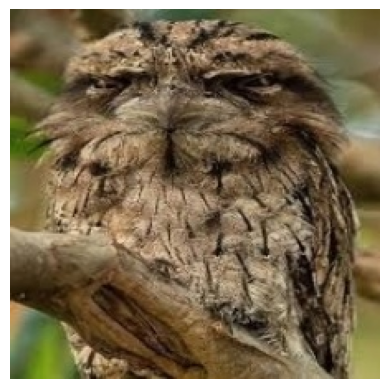

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Obtenemos el valor de la posición en el dataset de la imagen a mostrar aleatoriamente
idx = np.random.randint(0, len(df)-1)

# Obtenemos la imagen a partir de la posición
Ruta = 'my_dataset/'+df["filepaths"][idx]

# Mostramos la imagen
Label = df["labels"][idx]
print("[INFO] Ejemplo de imagen: " + Ruta + "; Especie : " + Label)
try:
  img = cv2.imread(Ruta, cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.axis("off")
  plt.imshow(img)
  print("[INFO] Tamaño de imagen:", img.shape)
except:
  print("[ERROR] No se pudo mostrar la imagen")


Ya hemos analizado y mostrado los datos. A continuación, realizamos la obtención de las imágenes repartidas en entrenamiento, validación y test.

Found 84480 validated image filenames belonging to 524 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 155 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


Found 2620 validated image filenames belonging to 524 classes.
Found 2620 validated image filenames belonging to 524 classes.
<class 'keras.src.preprocessing.image.DataFrameIterator'>
84480
[INFO] Tamaño de las imágenes generadas: (224, 224, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


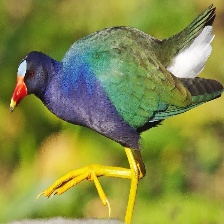

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Obtención de las imágenes repartidas
train_datagen = ImageDataGenerator(rescale=1./255 )
train_flow = train_datagen.flow_from_dataframe(df[df['data set']=='train'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=(img.shape[0], img.shape[1]))
valid_flow = train_datagen.flow_from_dataframe(df[df['data set']=='valid'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=(img.shape[0], img.shape[1]))
test_flow = train_datagen.flow_from_dataframe(df[df['data set']=='test'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=(img.shape[0], img.shape[1]))

V = train_flow[0][0][0]

print(type(train_flow))
print(train_flow.n)
print("[INFO] Tamaño de las imágenes generadas:", V.shape)


image.array_to_img(V)
#print(image.shape)

#### Errores detectados al analizar la información
Procedemos a identificar posibles errores en la información. Nos encontramos con los siguientes:
- Aparece un _warning_ que nos indica que las rutas de las imágenes del dataframe no son válidas.
- En el dataframe nos encontramos con 525 especies diferentes de pájaro, mientras que en el código anterior indica que hay 524 especies. Por tanto, se pierde una especie.

Una vez detectados los errores, entendemos qué ocurren e intenamos solucionarlo.

In [ ]:
# Buscamos las rutas inválidas
for file_path in df[df['data set']=='valid']["filepaths"]:
  Ruta = 'my_dataset/'+file_path
  ##print(Ruta)
  try:
    img = cv2.imread(Ruta, cv2.COLOR_BGR2RGB)
    shape=img.shape
    #print(shape)
  except:
    print('[INFO] Invalid image file:', file_path)


[INFO] Invalid image file: valid/PARAKETT  AKULET/4.jpg
[INFO] Invalid image file: valid/PARAKETT  AKULET/3.jpg
[INFO] Invalid image file: valid/PARAKETT  AKULET/5.jpg
[INFO] Invalid image file: valid/PARAKETT  AKULET/1.jpg
[INFO] Invalid image file: valid/PARAKETT  AKULET/2.jpg


Vemos que en el dataframe está mal escrito la carpeta "PARAKETT  AKULET". Vamos a corregirlo.

In [ ]:
# Vemos que hay la carpeta con nombre "PARAKETT  AUKLET"
!ls my_dataset/train/PARAKETT\ \ AUKLET

!ls my_dataset/valid/

001.jpg  016.jpg  031.jpg  046.jpg  061.jpg  076.jpg  091.jpg  106.jpg	121.jpg  136.jpg  151.jpg
002.jpg  017.jpg  032.jpg  047.jpg  062.jpg  077.jpg  092.jpg  107.jpg	122.jpg  137.jpg  152.jpg
003.jpg  018.jpg  033.jpg  048.jpg  063.jpg  078.jpg  093.jpg  108.jpg	123.jpg  138.jpg  153.jpg
004.jpg  019.jpg  034.jpg  049.jpg  064.jpg  079.jpg  094.jpg  109.jpg	124.jpg  139.jpg  154.jpg
005.jpg  020.jpg  035.jpg  050.jpg  065.jpg  080.jpg  095.jpg  110.jpg	125.jpg  140.jpg  155.jpg
006.jpg  021.jpg  036.jpg  051.jpg  066.jpg  081.jpg  096.jpg  111.jpg	126.jpg  141.jpg
007.jpg  022.jpg  037.jpg  052.jpg  067.jpg  082.jpg  097.jpg  112.jpg	127.jpg  142.jpg
008.jpg  023.jpg  038.jpg  053.jpg  068.jpg  083.jpg  098.jpg  113.jpg	128.jpg  143.jpg
009.jpg  024.jpg  039.jpg  054.jpg  069.jpg  084.jpg  099.jpg  114.jpg	129.jpg  144.jpg
010.jpg  025.jpg  040.jpg  055.jpg  070.jpg  085.jpg  100.jpg  115.jpg	130.jpg  145.jpg
011.jpg  026.jpg  041.jpg  056.jpg  071.jpg  086.jpg  101.jpg  116.jpg	131.

In [12]:
# Renombramos las carpetas que tienen un espacio de más
!mv my_dataset/train/PARAKETT\ \ AUKLET my_dataset/train/PARAKETT\ AUKLET
!mv my_dataset/test/PARAKETT\ \ AUKLET my_dataset/test/PARAKETT\ AUKLET

!ls my_dataset/train/PARAKETT\ AUKLET

001.jpg  016.jpg  031.jpg  046.jpg  061.jpg  076.jpg  091.jpg  106.jpg	121.jpg  136.jpg  151.jpg
002.jpg  017.jpg  032.jpg  047.jpg  062.jpg  077.jpg  092.jpg  107.jpg	122.jpg  137.jpg  152.jpg
003.jpg  018.jpg  033.jpg  048.jpg  063.jpg  078.jpg  093.jpg  108.jpg	123.jpg  138.jpg  153.jpg
004.jpg  019.jpg  034.jpg  049.jpg  064.jpg  079.jpg  094.jpg  109.jpg	124.jpg  139.jpg  154.jpg
005.jpg  020.jpg  035.jpg  050.jpg  065.jpg  080.jpg  095.jpg  110.jpg	125.jpg  140.jpg  155.jpg
006.jpg  021.jpg  036.jpg  051.jpg  066.jpg  081.jpg  096.jpg  111.jpg	126.jpg  141.jpg
007.jpg  022.jpg  037.jpg  052.jpg  067.jpg  082.jpg  097.jpg  112.jpg	127.jpg  142.jpg
008.jpg  023.jpg  038.jpg  053.jpg  068.jpg  083.jpg  098.jpg  113.jpg	128.jpg  143.jpg
009.jpg  024.jpg  039.jpg  054.jpg  069.jpg  084.jpg  099.jpg  114.jpg	129.jpg  144.jpg
010.jpg  025.jpg  040.jpg  055.jpg  070.jpg  085.jpg  100.jpg  115.jpg	130.jpg  145.jpg
011.jpg  026.jpg  041.jpg  056.jpg  071.jpg  086.jpg  101.jpg  116.jpg	131.

In [13]:
# Obtenemos en un nuevo dataframe para mostrarlo, los valores que se encuentran en la carpeta  PARAKETT  AKULET
df2 = df[df['filepaths'].str.contains("PARAKETT  AKULET")]
display(df2.head(10))

# Corregimos el dataframe
df_corregido = df
df_corregido['filepaths'] = df['filepaths'].str.replace('PARAKETT  AKULET', 'PARAKETT AUKLET')

,class id,filepaths,labels,data set,scientific name
59400,373.0,train/PARAKETT AKULET/038.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59401,373.0,train/PARAKETT AKULET/079.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59402,373.0,train/PARAKETT AKULET/137.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59403,373.0,train/PARAKETT AKULET/128.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59404,373.0,train/PARAKETT AKULET/005.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59405,373.0,train/PARAKETT AKULET/015.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59406,373.0,train/PARAKETT AKULET/018.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59407,373.0,train/PARAKETT AKULET/077.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59408,373.0,train/PARAKETT AKULET/007.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59409,373.0,train/PARAKETT AKULET/011.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA


Volvemos a Crear los generadores de imagenes desde el dataframe. Disminuyo el tamaño de las imágenes a la mitad para que los modelos puedan entrenar en menor tiempo.

Found 84635 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
84635
Tamaño de las imágenes generadas: (112, 112, 3)


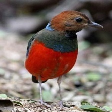

In [14]:
#train_datagen = ImageDataGenerator(rescale=1./255 )
dimensiones = (img.shape[0]//2, img.shape[1]//2)

train_flow_corregido = train_datagen.flow_from_dataframe(df_corregido[df_corregido['data set']=='train'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=dimensiones)
valid_flow_corregido = train_datagen.flow_from_dataframe(df_corregido[df_corregido['data set']=='valid'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=dimensiones)
test_flow_corregido  = train_datagen.flow_from_dataframe(df_corregido[df_corregido['data set']=='test'],  directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=dimensiones)

V = train_flow_corregido[0][0][0]

print(train_flow_corregido.n)
print("Tamaño de las imágenes generadas:", V.shape)

image.array_to_img(V)

## Estructura de la red

### Estrategia 1: Entrenar desde cero o from scratch

La primera estrategia a comparar será una red neuronal profunda que el alumno debe diseñar, entrenar y optimizar. Se debe justificar empíricamente las decisiones que llevaron a la selección de la arquitectura e hiperparámetros final. Se espera que el alumno utilice todas las técnicas de regularización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# Definimos layer de entreda
input = layers.Input(shape=(V.shape[0], V.shape[1], V.shape[2]))

# 1.BASE MODEL

# Bloque 1
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)

# Bloque 2
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)

# Bloque 3
x3 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(128, (3,3), padding="same", activation="relu")(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)

# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x3)
predictions = layers.Dense(nEspecies, activation="softmax")(gap)

# 3. Unimos las entradas y salidas del modelo
convnet_aug = Model(inputs=input, outputs=predictions)
convnet_aug.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0     

In [ ]:
from tensorflow.keras.optimizers import Adam

# Definicion de hiperparametros
batch_size=128
learning_rate=0.001
epochs=20

# Compilamos el modelo - modificamos loss para tener en cuenta ohe
convnet_aug.compile(optimizer=Adam(learning_rate=learning_rate),
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])


H = convnet_aug.fit(train_flow_corregido,
                    epochs=epochs,
                    steps_per_epoch=train_flow_corregido.n // batch_size,
                    validation_data=valid_flow_corregido)


Epoch 1/20
661/661 [==============================] - 40s 53ms/step - loss: 5.7053 - accuracy: 0.0212 - val_loss: 5.6488 - val_accuracy: 0.0229
Epoch 2/20
661/661 [==============================] - 39s 60ms/step - loss: 4.9654 - accuracy: 0.0670 - val_loss: 4.7550 - val_accuracy: 0.0926
Epoch 3/20
661/661 [==============================] - 36s 55ms/step - loss: 4.3699 - accuracy: 0.1263 - val_loss: 4.2601 - val_accuracy: 0.1360
Epoch 4/20
661/661 [==============================] - 38s 57ms/step - loss: 3.8085 - accuracy: 0.2044 - val_loss: 3.3851 - val_accuracy: 0.2579
Epoch 5/20
661/661 [==============================] - 39s 60ms/step - loss: 3.2827 - accuracy: 0.2991 - val_loss: 2.9562 - val_accuracy: 0.3455
Epoch 6/20
661/661 [==============================] - 37s 56ms/step - loss: 2.8627 - accuracy: 0.3764 - val_loss: 2.9540 - val_accuracy: 0.3771
Epoch 7/20
661/661 [==============================] - 36s 54ms/step - loss: 2.5193 - accuracy: 0.4375 - val_loss: 2.2176 - val_accuracy:

Función para visualizar el progreso del entrenamiento

In [15]:
# Funciones base
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

Visualizamos los resultados

83/83 [==============================] - 3s 37ms/step - loss: 0.7995 - accuracy: 0.8023
Accuracy: 80.23%


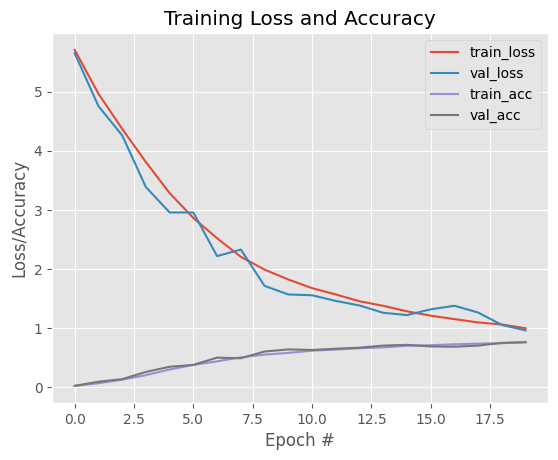

In [ ]:
# Learning curves
visualize_learning_curve(H)

scores = convnet_aug.evaluate(test_flow_corregido)
print("Accuracy: %.2f%%" % (scores[1]*100))

### Estrategia 2: DenseNet121

In [18]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Definicion de hiperparametros
batch_size=128
learning_rate=0.001
epochs=20

# Paso 1: Cargamos la arquitectura preentrenada ResNet50
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Paso 2: Congelamos las capas preentrenadas (es opcional, pero creo que es muy necesario)
# Esto nos permite evitar que los pesos preentrenados se modifiquen demasiado, y se pierdan las características generales aprendidas (Solo se entrenarán las nuevas capas)
# Además, permite que las capas preentrenadas sufran sobreajustes y se degrade su. rendimiento
for layer in base_model.layers:
    layer.trainable = False

# Paso 3: Agregamos una capa de clasificación en la parte superior
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Ajustamos el tamaño de la capa según sea necesario
predictions = Dense(nEspecies, activation='softmax')(x)

# Paso 4: Creamos el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Paso 5: Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Paso 6: Entrenamos el modelo
history = model.fit(train_flow_corregido,
                    epochs=epochs,
                    steps_per_epoch=train_flow_corregido.n // batch_size,
                    validation_data=valid_flow_corregido,
                    validation_steps=valid_flow_corregido.n // batch_size)

# Paso 7: Evaluamos el modelo
test_loss, test_acc = model.evaluate(test_flow_corregido)
print("Precisión en el conjunto de pruebas:", test_acc)

Epoch 1/20
661/661 [==============================] - 907s 1s/step - loss: 3.2841 - accuracy: 0.3333 - val_loss: 1.7590 - val_accuracy: 0.5375
Epoch 2/20
661/661 [==============================] - 887s 1s/step - loss: 1.7443 - accuracy: 0.5742 - val_loss: 1.4982 - val_accuracy: 0.6000
Epoch 3/20
661/661 [==============================] - 874s 1s/step - loss: 1.4493 - accuracy: 0.6338 - val_loss: 1.2043 - val_accuracy: 0.6938
Epoch 4/20
661/661 [==============================] - 849s 1s/step - loss: 1.3096 - accuracy: 0.6646 - val_loss: 1.0654 - val_accuracy: 0.6984
Epoch 5/20
661/661 [==============================] - 863s 1s/step - loss: 1.1964 - accuracy: 0.6908 - val_loss: 0.9796 - val_accuracy: 0.7312
Epoch 6/20
661/661 [==============================] - 854s 1s/step - loss: 1.1191 - accuracy: 0.7118 - val_loss: 1.0559 - val_accuracy: 0.7344
Epoch 7/20
661/661 [==============================] - 862s 1s/step - loss: 1.0528 - accuracy: 0.7315 - val_loss: 0.9301 - val_accuracy: 0.7656

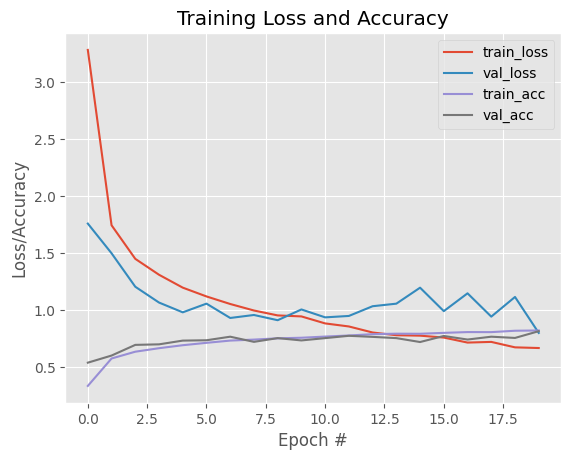

In [19]:
# Learning curves
visualize_learning_curve(history)

#scores = convnet_aug.evaluate(test_flow_corregido)
#print("Accuracy: %.2f%%" % (scores[1]*100))

## Imprimir PDF

In [ ]:
# Ejecutando los siguientes comandos en la última celda del Colab Notebook se convierte de ".ipynb" a PDF
# En caso de querer ocultar la salida de una celda puesto que no tenga relevancia se debe insertar
# el comando %%capture al inicio de la misma. Véase la celda que contiene !ls test en este Notebook.

In [ ]:
name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir='$BASE_FOLDER' '$BASE_FOLDER''$name_IPYNB_file' --to pdf"
        )